<a href="https://colab.research.google.com/github/chalsai/Diabetes-Prediction/blob/main/Week8_Thursday_cluster_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform wine segmentation.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with clear boundaries.

### c) Understanding the Context 

Champagne Company is a leading wine company that specialises in the importation and
distribution of premium and super-premium wines, champagnes and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialised products and the ever-increasing tourism industry
where guests don ́t want to settle for less.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [ ]:
df = pd.read_csv('https://bit.ly/2UBJERh')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# check dataset shape
df.shape

(178, 13)

In [ ]:
# chekc data types
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(178, 13)

In [ ]:
# check for missing data
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## <font color='#2F4F4F'>3. Data Analysis</font>

In [ ]:
# get descriptive statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


What do you notice about the descriptive statistics, particularly the ranges? What does this tell you?

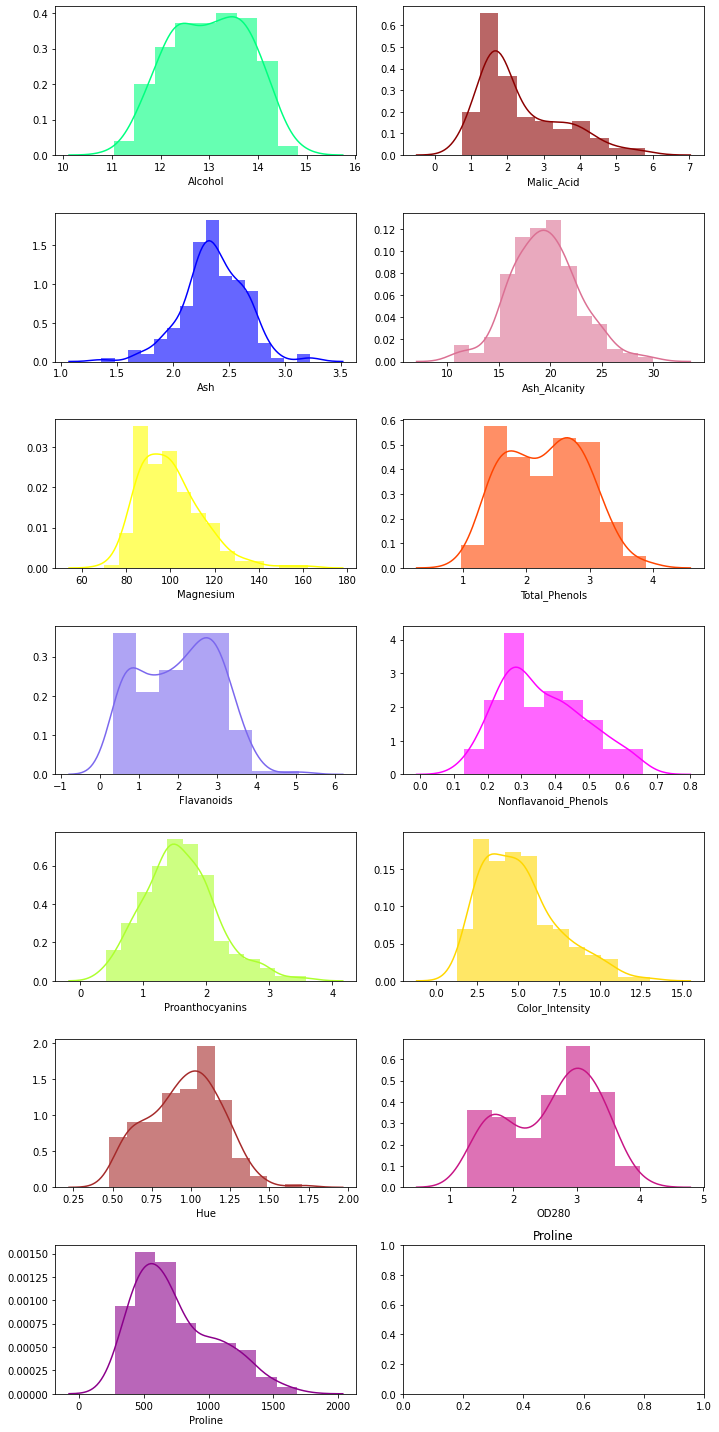

In [ ]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()

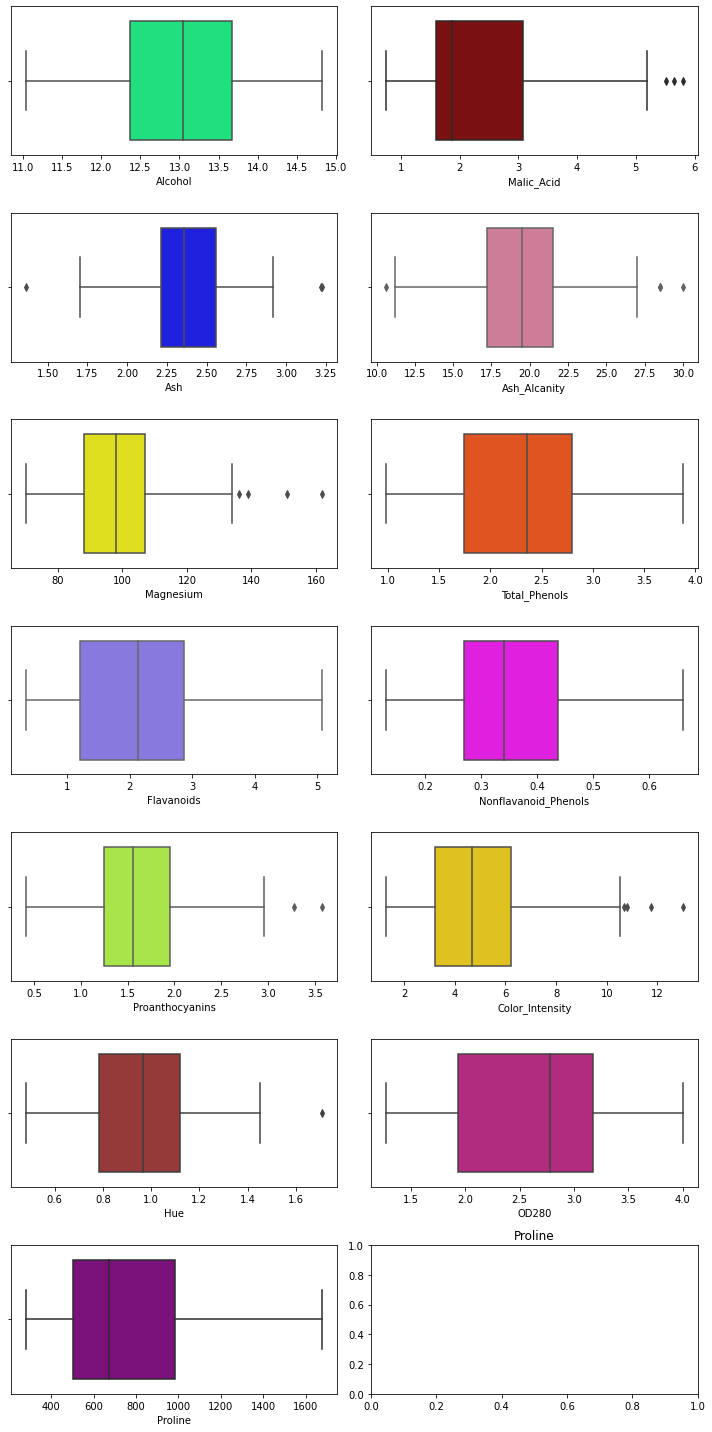

In [ ]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

- Malic acids and magnesium have the largest number of outliers.
- Alcohol, proline, OD280,flavanoids, nonflavanoids and Total phenols does not have any outliers.

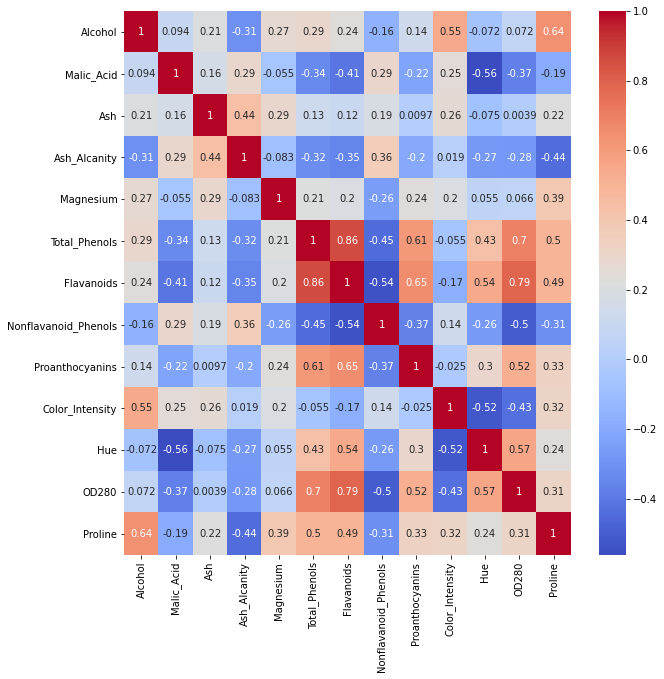

In [ ]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()



There is high correlation between flavanoids and total phenols, OD280.

In [ ]:
df.drop(columns=['Flavanoids'], inplace= True)

## <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
# set all the features into X

x = df.iloc[:,].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
# scale our features
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(x) 
x = norm.transform(x)


### 4.1 KMeans Clustering

In [ ]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

clusterer = KMeans(5, random_state=0)
clusterer.fit(x)
# getting the cluster labels
clusterer.labels_


array([0, 0, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 3, 3,
       0, 0, 3, 3, 0, 2, 3, 0, 2, 2, 0, 2, 0, 3, 3, 0, 0, 3, 3, 0, 0, 4,
       3, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 3, 4, 3, 1, 1, 0, 3, 1, 1, 1, 3, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 3, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 1, 4, 3, 3, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 3, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 3, 4, 1, 1, 4, 3, 3, 3,
       3, 4], dtype=int32)

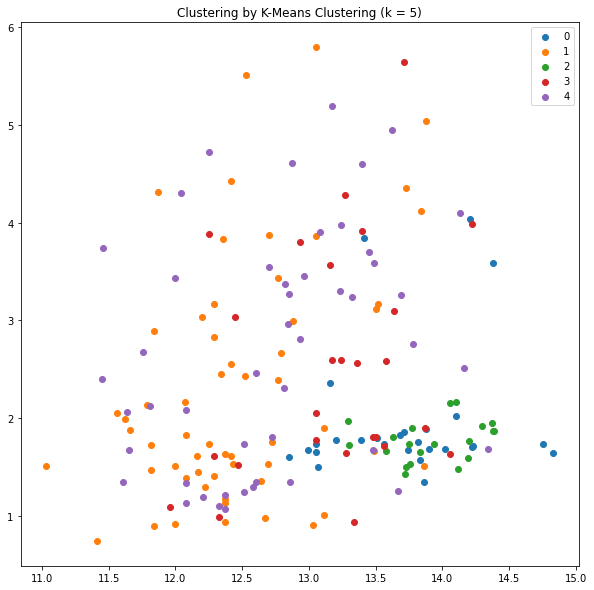

In [ ]:
# getting the KMeans scatter plot
kmeans_pred = clusterer.labels_
kmeans_clust = np.unique(kmeans_pred)



plt.figure(figsize = (10, 10))
for cluster in kmeans_clust:
    r = np.where(kmeans_pred == cluster)
    plt.scatter(x[r, 0], x[r, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)")
plt.legend()
plt.show()

In [ ]:
# getting the optimum value of k for our KMeans model using the Elbow Method

Error = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)



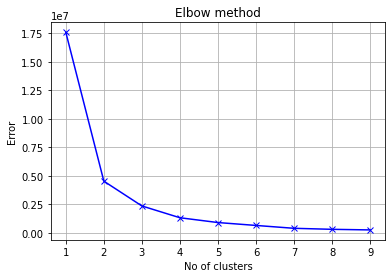

In [ ]:
# visualizing the distribution of errors per number of clusters

plt.plot(range(1, 10), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

From the above Elbow Method, 4 clusters are ideal 



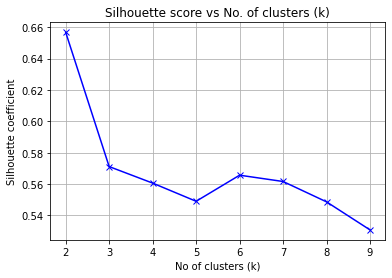

In [ ]:
#trying to improve the model throu' Silhouette Analysis model  and visualizing it


from sklearn.metrics import silhouette_score

silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x) 
    silhouette.append(silhouette_score(x, kmeans.labels_))

    
plt.plot(range(2, 10), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);

The silhouette plot shows the that the silhouette coefficient is highest when k = 3, implying that the optimal number of clusters is 2 and hence three segments for our dataset.

In [ ]:
# add these cluster labels to our dataset
df['kmeans_cluster'] = clusterer.predict(x)

# previewing a sample of our dataset

df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,4
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,1
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,4
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,3
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,2
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,4
75,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,1
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,1
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,4
76,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392,1


### 4.2 Hierarchical Agglomerative Clustering

(178, 15)

In [ ]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering
agglo_clusterer = AgglomerativeClustering(n_clusters= 5, linkage='ward', affinity='euclidean').fit(x) 

# get the labels
labels2 = agglo_clusterer.labels_
labels2

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 4, 4, 0,
       2, 2, 0, 0, 0, 4, 2, 3, 0, 4, 4, 2, 0, 2, 4, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 4, 4, 3, 0, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 4, 4, 4, 2, 4, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 2, 4, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

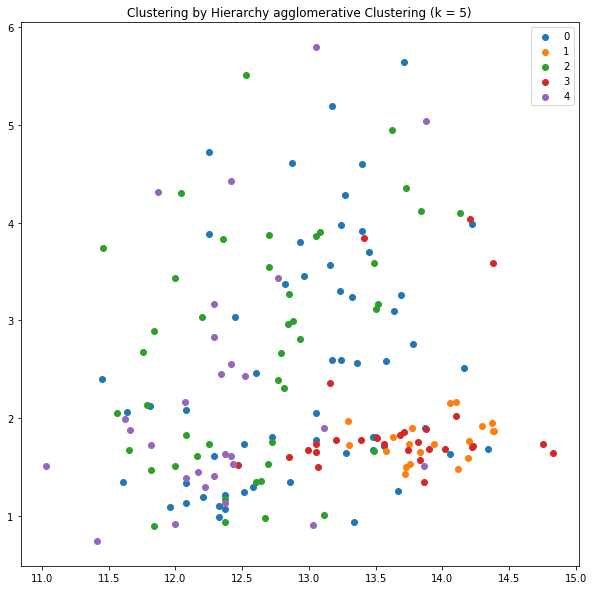

In [ ]:
# Creating a scatter plot of the cluster analysis


agglo_pred =agglo_clusterer.labels_
agglo_clust = np.unique(agglo_pred)



plt.figure(figsize = (10,10))
for cluster in agglo_clust:
    row_ix = np.where(agglo_pred == cluster)
    plt.scatter(x[row_ix, 0], x[row_ix, 1], label = cluster)
    
plt.title("Clustering by Hierarchy agglomerative Clustering (k = 5)")
plt.legend()
plt.show()


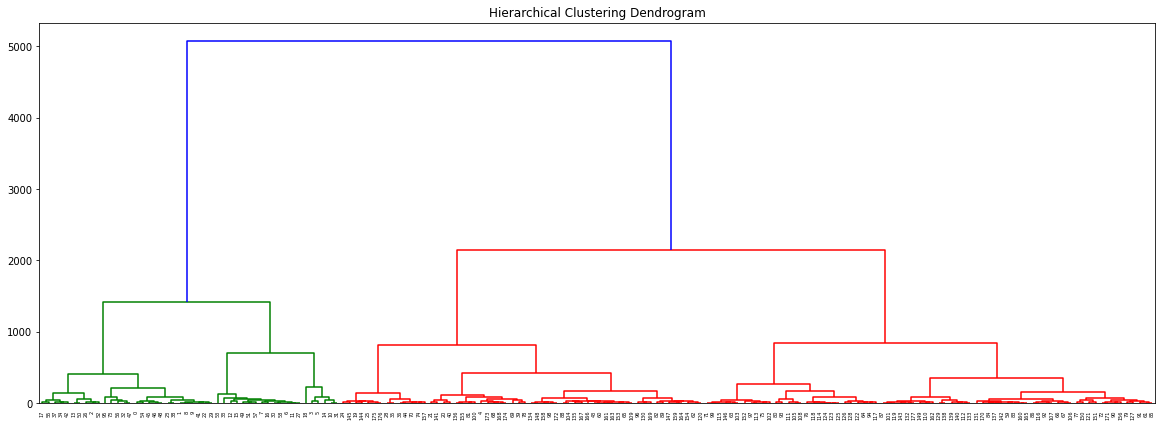

In [ ]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.figure(figsize=(20, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = hierarchy.dendrogram(hierarchy.linkage(x, method='ward'))

from the dendrogram we can deduce that 3 isthe optimal number of clusters for 


this particular dataset.

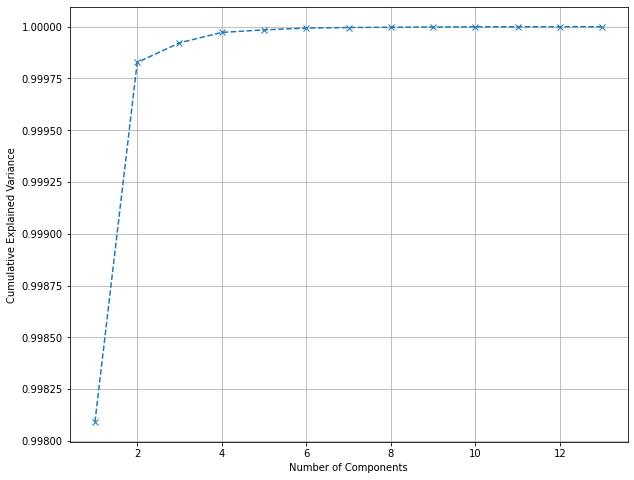

In [ ]:
# improve your agglomerative clustering model

from sklearn.decomposition import PCA

# fitting PCA to our data 
pca = PCA()
pca.fit(x)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

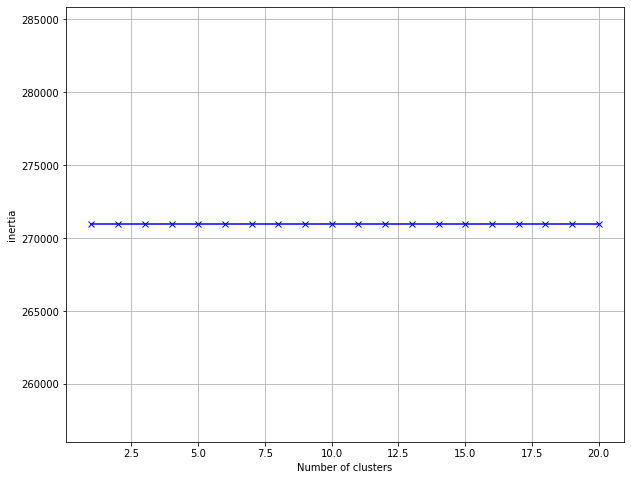

In [ ]:
# using the hierachy Method to determine the ideal number of clusters for K-Means

wcss = [] # stands for "Within Cluster Sum of Squares"
for i in range(1, 21):
    agglo_clusterer = AgglomerativeClustering(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# visualizing the inertia (WCSS)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.show()

Is your agglomerative model with a new value for k better than the first one?

In [ ]:
# adding to our dataset
df['agglo_clusterer'] = labels2

# previewing a sample of our dataset
df.sample(20)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster,agglo_clusterer
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,0,3
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,3,0
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,1,2
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,1,4
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590,4,2
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190,0,3
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,2,1
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,1,2
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,4,0
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,3,0


In [ ]:
pd.value_counts(df['agglo_clusterer'])

0    58
2    44
4    28
3    28
1    20
Name: agglo_clusterer, dtype: int64

## <font color='#2F4F4F'>5. Summary of Findings</font>
- Malic acids and magnesium have the largest number of outliers.
- There is high correlation between flavanoids and total phenols.
- There is high correlation between flavanoids and OD280.
- When carrying out kmeans clustering cluster 0 had the highest number of elements.


## <font color='#2F4F4F'>6. Recommendations</font>


The alcohols which fall under cluster 0 should be considered as the most exclusive brands of wine more accessible at an affordable price. 
And then cluster 1 forms is inaccessible and expensive.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) The question we had for the project was appropriate for the given dataset.

#### b) Basing from the results, the data set was good for the analysis.


#### c) To improve on the  solution we need to have more observations and also perform feature engineering and hyperparameter tuning to our data before carrying out modeling.